# What are the main patterns in Team GB medals since the modern Olympics were founded (1896)?

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("clean_olympics_dataset.csv")

In [201]:
df.head()

,Unnamed: 0,Name,Sex,Age,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal
0,51139,GEORGES DAVIEL DE LA NZIRE,M,17,FRANCE,FRANCE,FRA,1896 SUMMER,1896,SUMMER,ATHINA,ATHLETICS,ATHLETICS MEN'S 800 METRES,NONE
1,33940,EUGNE HENRI CALLOT,M,20,FRANCE,FRANCE,FRA,1896 SUMMER,1896,SUMMER,ATHINA,FENCING,"FENCING MEN'S FOIL, INDIVIDUAL",SILVER
2,51201,HENRI DE LABORDE,M,25,FRANCE,FRANCE,FRA,1896 SUMMER,1896,SUMMER,ATHINA,FENCING,"FENCING MEN'S FOIL, INDIVIDUAL",NONE
3,52537,J. DEFERT,M,25,FRANCE,FRANCE,FRA,1896 SUMMER,1896,SUMMER,ATHINA,TENNIS,TENNIS MEN'S SINGLES,NONE
4,63068,LAUNCESTON ELLIOT,M,21,GREAT BRITAIN,GREAT BRITAIN,GBR,1896 SUMMER,1896,SUMMER,ATHINA,ATHLETICS,ATHLETICS MEN'S 100 METRES,NONE


In [202]:
gbr_df = df.copy()
gbr_df = df[(df['Country'] == 'GREAT BRITAIN')] # specifying a df for Team GB

In [204]:
summer_gbr = gbr_df.copy()
summer_gbr = gbr_df[(gbr_df['Season'] == 'SUMMER')] # specifying a df for the Summer Olympics

In [207]:
winter_gbr = gbr_df.copy()
winter_gbr = gbr_df[(gbr_df['Season'] == 'WINTER')] # specifying a df for the Winter Olympics

## Medals

### All Medals for Team GB in Summer Olympics
* The lowest number of medals received by Team GB in recent history was in the 1996 Olympic Games
* The lowest number of medals ever achieved by Team GB was in 1904
* The best year to date for Team GB was 1908
* Since 1996, Team GB has seen an increase in medal achievement, especially in the number of silver and gold medals  

In [212]:
gbr_medals_all = gbr_df[gbr_df['Medal'] != 'NONE'] # filtering to only include medal winners

In [213]:
len(gbr_medals_all) # counting total number of medals

784

In [216]:
summer_gbr_medals_all = gbr_medals_all[gbr_medals_all['Season'] == 'SUMMER'] # filtering to only include the Summer Olympics

In [218]:
len(summer_gbr_medals_all)

749

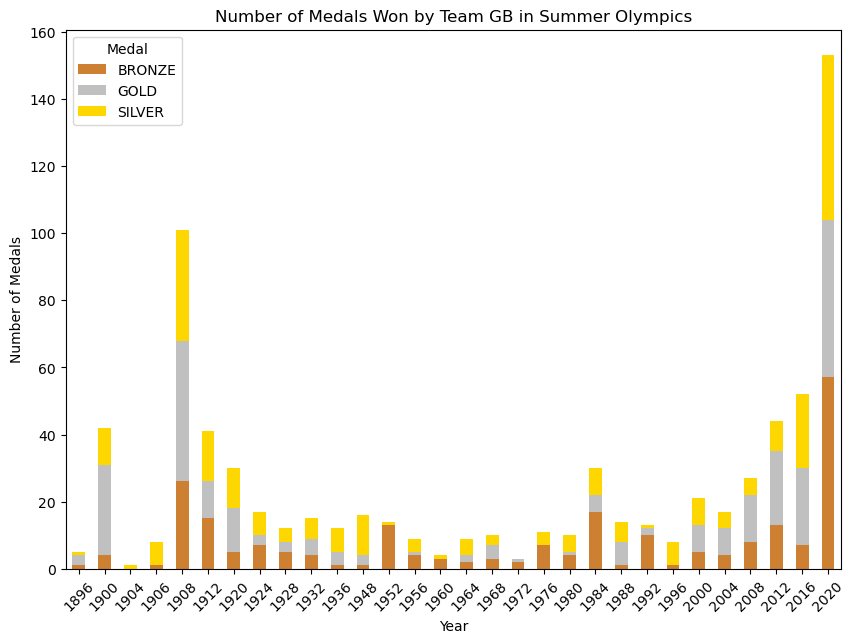

In [220]:
summer_gbr_medal_count = summer_gbr_medals_all.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
summer_gbr_medal_count.plot(kind='bar', stacked=True, color=['#CD7F32', '#C0C0C0', '#FFD700'], figsize=(10, 7))

plt.title('Number of Medals Won by Team GB in Summer Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Medal')
plt.xticks(rotation=45)
plt.show()

In [221]:
summer_gbr_medal_count

Medal,BRONZE,GOLD,SILVER
Year,,,
1896,1,3,1
1900,4,27,11
1904,0,0,1
1906,1,0,7
1908,26,42,33
1912,15,11,15
1920,5,13,12
1924,7,3,7
1928,5,3,4


In [222]:
summer_gbr_medals_modern = summer_gbr_medals_all[summer_gbr_medals_all['Year'] >= 1945] # looking to see more modern games

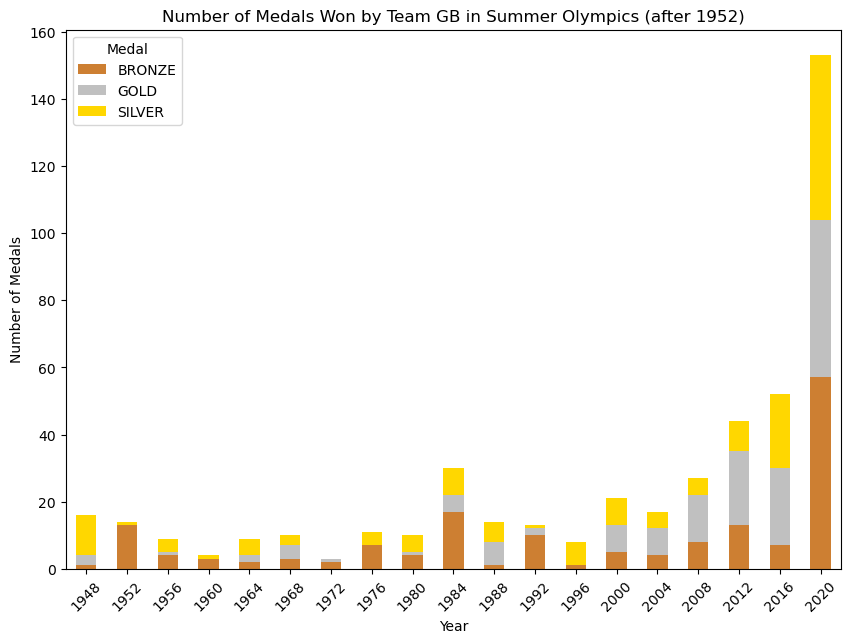

In [223]:
summer_gbr_medal_count_modern = summer_gbr_medals_modern.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
summer_gbr_medal_count_modern.plot(kind='bar', stacked=True, color=['#CD7F32', '#C0C0C0', '#FFD700'], figsize=(10, 7))

plt.title('Number of Medals Won by Team GB in Summer Olympics (after 1952)')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Medal')
plt.xticks(rotation=45)
plt.show()

### All Medals for Team GB in Winter Olympics
* Great Britain sees less success in the Winter Olympics

In [228]:
winter_gbr_medals_all = gbr_medals_all[gbr_medals_all['Season'] == 'WINTER'] # filtering for the Winter Games

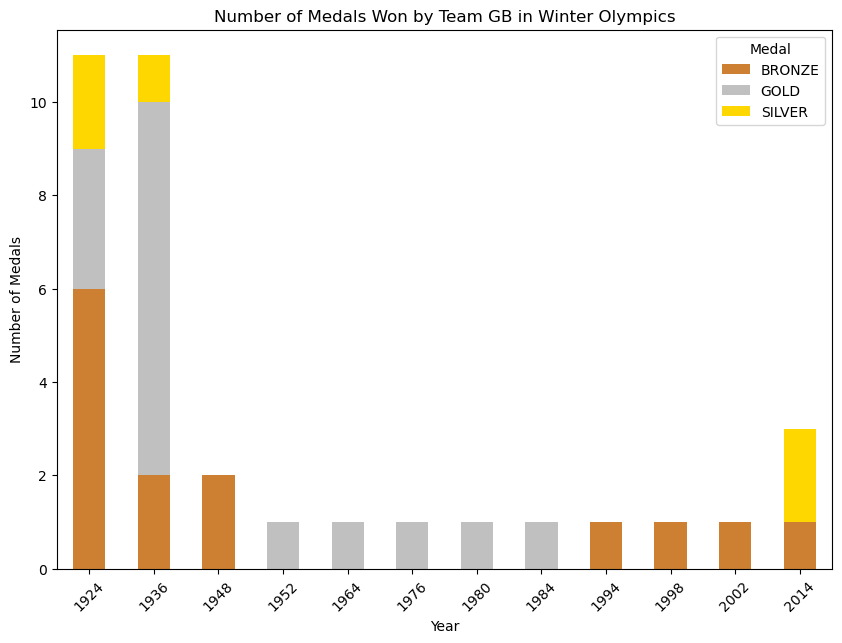

In [229]:
winter_gbr_medal_count = winter_gbr_medals_all.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
winter_gbr_medal_count.plot(kind='bar', stacked=True, color=['#CD7F32', '#C0C0C0', '#FFD700'], figsize=(10, 7))

plt.title('Number of Medals Won by Team GB in Winter Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Medal')
plt.xticks(rotation=45)
plt.show()

In [230]:
winter_gbr_medal_count

Medal,BRONZE,GOLD,SILVER
Year,,,
1924,6,3,2
1936,2,8,1
1948,2,0,0
1952,0,1,0
1964,0,1,0
1976,0,1,0
1980,0,1,0
1984,0,1,0
1994,1,0,0


## Demographics

### Number of female to male athletes in the Summer Olympics
* The number of female to male athletes within the British Olympics team has become more equal over the years
* The greatest difference between the number of female and male athletes was in 1908

#### Number of female and male athletes overall
* The ratio of make to female athletes has become more equal in recent years

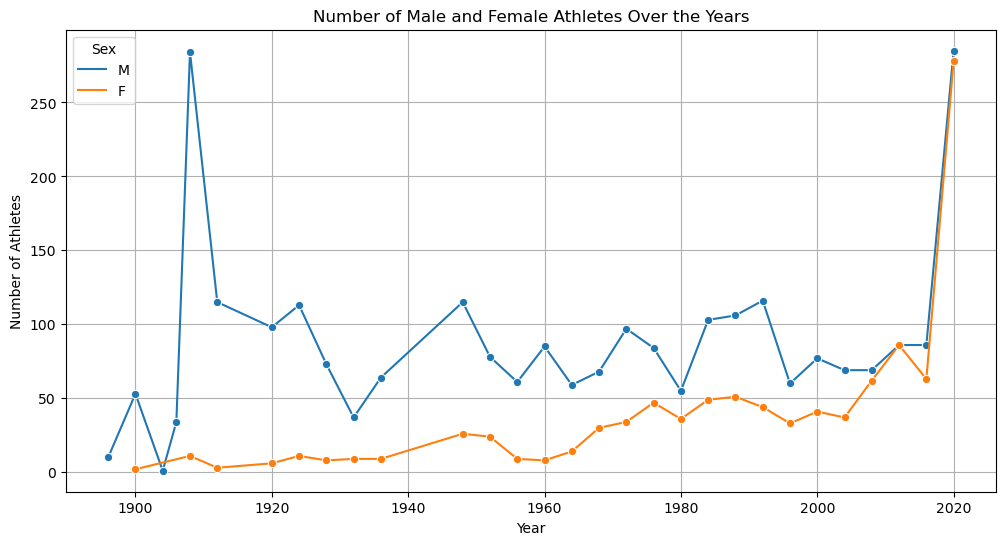

In [286]:
gbr_gender = summer_gbr.groupby(['Year', 'Sex']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=gbr_gender, x='Year', y='Count', hue='Sex', marker='o')

plt.title('Number of Male and Female Athletes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(title='Sex')
plt.grid(True)

plt.show()

#### Male and female medal winners
* Men tend to win medals more than women
* However, this could be due to the increased number of male athletes compared to female athletes

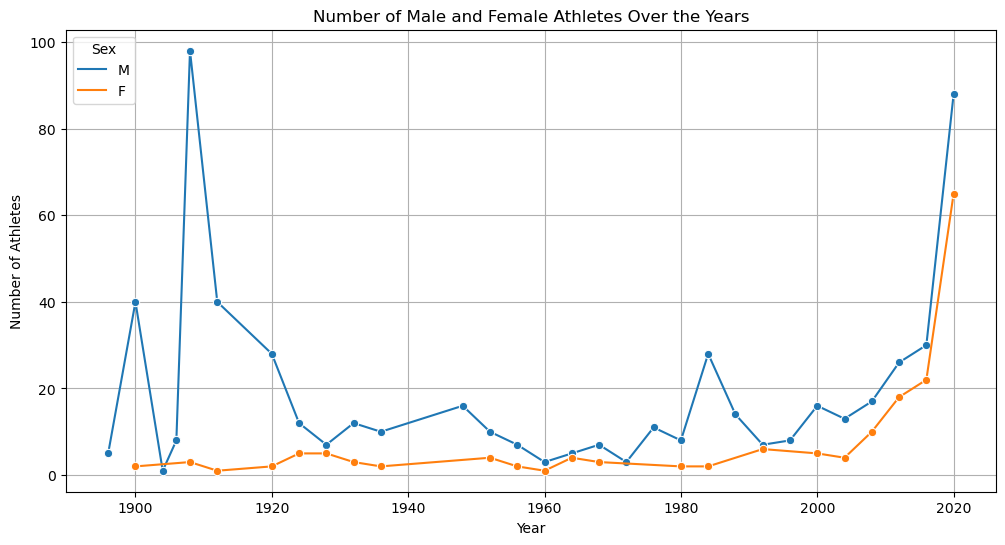

In [284]:
summer_gender = summer_gbr_medals_all.groupby(['Year', 'Sex']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=summer_gender, x='Year', y='Count', hue='Sex', marker='o')

plt.title('Number of Male and Female Athletes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(title='Sex')
plt.grid(True)

plt.show()

### Age of Team GB Olympic medallists
* The average age of athletes increased after World War 2
* The youngest average age was in 1960 at 21 years old
* The majority of athletes are between 20 and 30 years of age
* The youngest Team GB medallist was Sky Brown who won a bronze medal in Skateboarding in 2020 at the age of 13
* The oldest Team GB medallist was John Copely who was 73 in the 1948 Olympic Games where he won a silver medal in art competitions

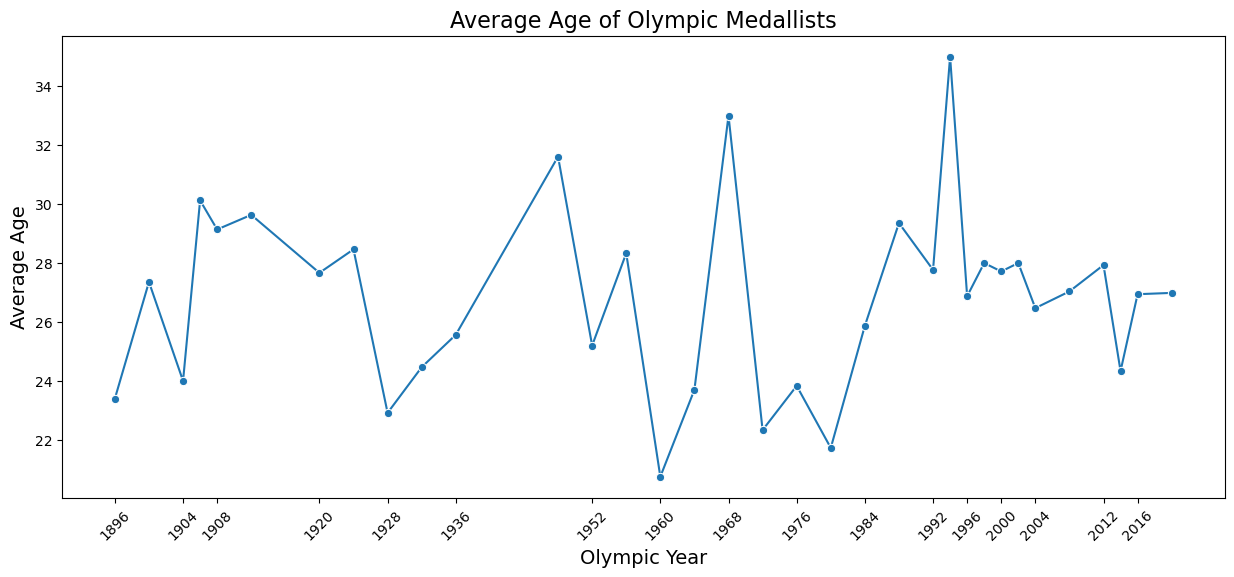

In [243]:
average_ages = gbr_medals_all.groupby('Year')['Age'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x='Year', y='Age', data=average_ages, marker='o')

plt.title('Average Age of Olympic Medallists', fontsize=16)
plt.xlabel('Olympic Year', fontsize=14)
plt.ylabel('Average Age', fontsize=14)
plt.xticks(average_ages['Year'])

# to stop the unreadable x-axis
years = average_ages['Year']
plt.xticks(ticks=years[::2], rotation=45)  

plt.show()

In [245]:
# average age in 1980
df_1960 = gbr_medals_all[gbr_df['Year'] == 1960]
mean_1960 = df_1960['Age'].mean()
mean_1960

/tmp/ipykernel_125/519141780.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1960 = gbr_medals_all[gbr_df['Year'] == 1960]


20.75

#### Age Distribution

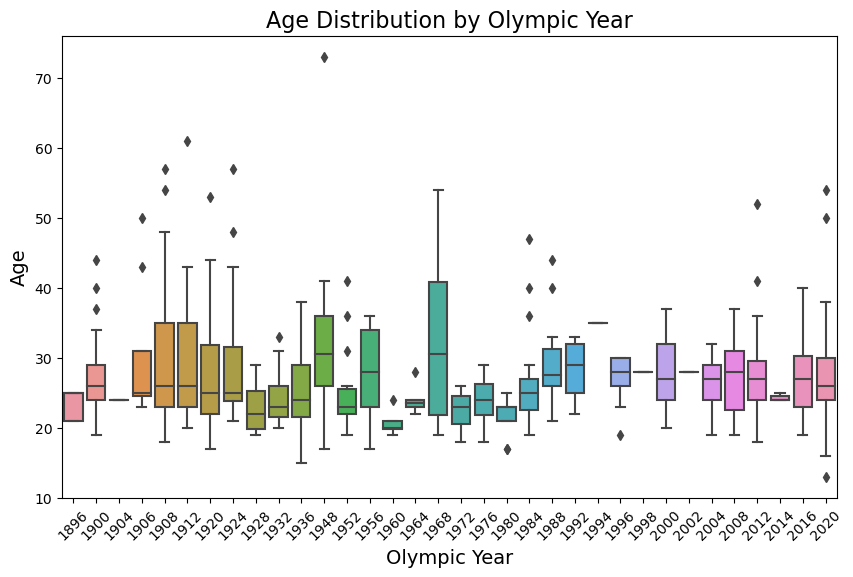

In [249]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Age', data=gbr_medals_all)

plt.title('Age Distribution by Olympic Year', fontsize=16)
plt.xlabel('Olympic Year', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(rotation=45)

plt.show()

#### Finding Youngest and Oldest Medallists in Team GB

In [251]:
summary_table = gbr_medals_all.groupby('Year')['Age'].describe()
summary_table

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1896,5.0,23.400000,2.190890,21.0,21.00,25.0,25.00,25.0
1900,42.0,27.357143,4.756620,19.0,24.00,26.0,29.00,44.0
1904,1.0,24.000000,NaN,24.0,24.00,24.0,24.00,24.0
1906,8.0,30.125000,10.357020,23.0,24.50,25.0,31.00,50.0
1908,101.0,29.138614,8.022505,18.0,23.00,26.0,35.00,57.0
1912,41.0,29.634146,8.656662,20.0,23.00,26.0,35.00,61.0
1920,30.0,27.666667,7.760792,17.0,22.00,25.0,31.75,53.0
1924,28.0,28.464286,8.565573,21.0,23.75,25.0,31.50,57.0
1928,12.0,22.916667,3.800917,19.0,19.75,22.0,25.25,29.0


In [252]:
youngest_athlete = gbr_medals_all[(gbr_medals_all['Year'] == 2020) & (gbr_medals_all['Age'] == 13)]
youngest_athlete_info = youngest_athlete[['Name', 'Sport', 'Medal']]
youngest_athlete

,Unnamed: 0,Name,Sex,Age,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal
77866,71764,SKY BROWN,F,13,GREAT BRITAIN,GREAT BRITAIN,GBR,2020 SUMMER,2020,SUMMER,TOKYO,SKATEBOARDING,WOMEN'S PARK,BRONZE


In [253]:
oldest_athlete = gbr_medals_all[(gbr_medals_all['Year'] == 1948) & (gbr_medals_all['Age'] == 73)]
oldest_athlete_info = oldest_athlete[['Name', 'Sport', 'Medal']]
oldest_athlete

,Unnamed: 0,Name,Sex,Age,Team,Country,NOC,Games,Year,Season,City,Sport,Event,Medal
11143,44584,JOHN (HERBERT CRAWFORD-) COPLEY (WILLIAMSON-),M,73,GREAT BRITAIN,GREAT BRITAIN,GBR,1948 SUMMER,1948,SUMMER,LONDON,ART COMPETITIONS,"ART COMPETITIONS MIXED PAINTING, GRAPHIC ARTS",SILVER


## Successful Sports

### Top Sport by Number of Medals
* Athletics, swimming, rowing, hockey, and cycling are the top five sports for Team GB
* These sports are where Team GB athletes have achieved the most number of medals

In [256]:
all_medals_sport = gbr_medals_all.groupby('Sport')['Medal'].count().reset_index()
sort_gbr_sport = all_medals_sport.sort_values(by='Medal', ascending=False)
top_gbr_sport = sort_gbr_sport.head(20)

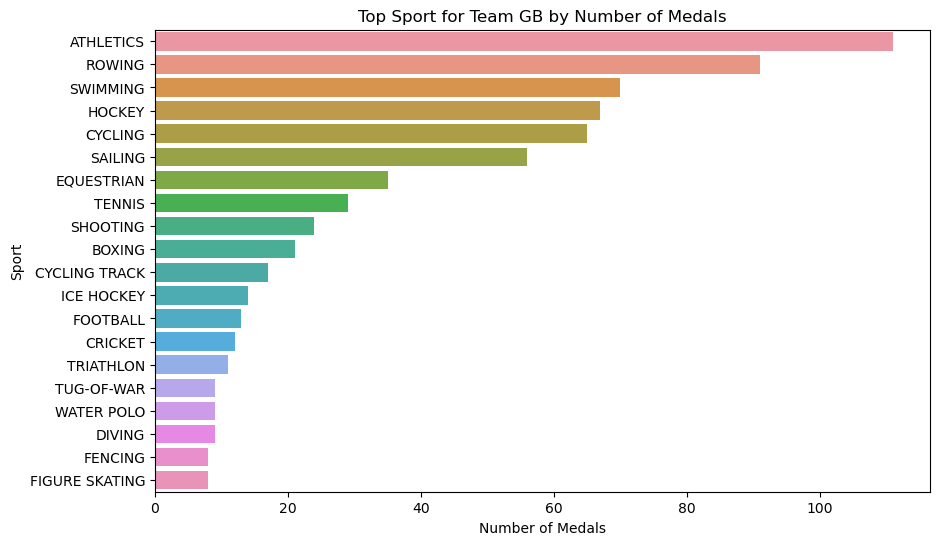

In [260]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Medal', y='Sport', data=top_gbr_sport)
plt.title('Top Sport for Team GB by Number of Medals')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')

plt.show()

### Winter Sports
* As the majory of medals won are from the Olympic Games, it might be worth looking at Winter sports specifically
* Sports from the Winter Games where Team GB has won medals are ice hockey, figure skating, bobsleigh, aplinism, curling, and skeleton

In [269]:
top_winter_sport = winter_gbr_medals_all.groupby('Sport')['Medal'].count().reset_index()
sort_winter_sport = top_winter_sport.sort_values(by='Medal', ascending=False)
winter_sport = sort_winter_sport.head(20)

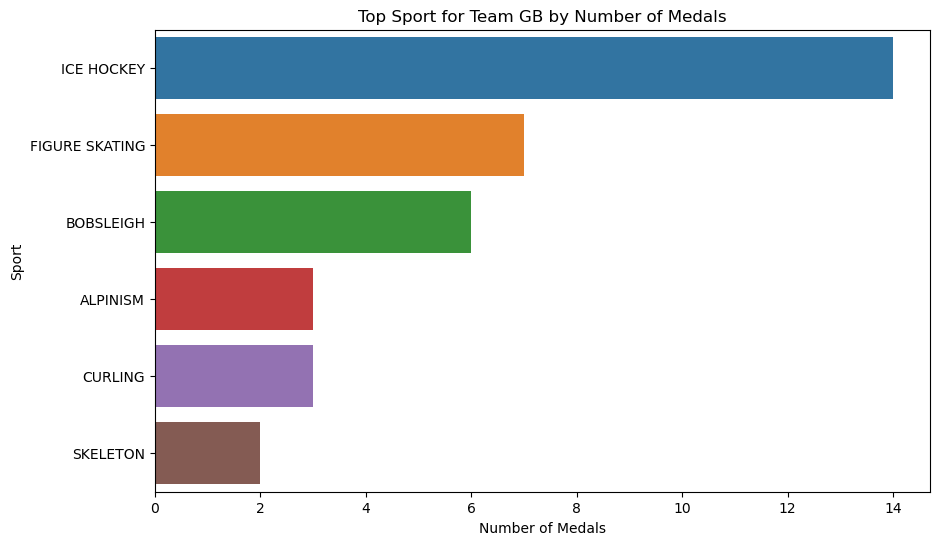

In [270]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Medal', y='Sport', data=winter_sport)
plt.title('Top Sport for Team GB by Number of Medals')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')

plt.show()

#### Alpinism?
* Several British mountaineers were part of an unsuccessful expedition of Mount Everest in 1922
* They were awarded medals in the 1924 Paris Olympic Games as part of a Mixed Team (they expedition also included non-British participants)
* [More info here!](https://web.archive.org/web/20240127200156/https://isoh.org/wp-content/uploads/JOH-Archives/JOHv21n3n.pdf)

In [274]:
alpinism = gbr_df[gbr_df['Sport'] == 'ALPINISM']['Year'].unique()
print(alpinism)

[1924]


## Conclusion
* Team GB has won a total of 784 Olympic medals: 749 from the Summer Games and 35 from the Winter Games
* The peak year for overall success was 1908 with 101 medals, while the most successful recent year (post-1945) was the 2016 Summer Games with 52 medals
* Team GB has achieved only 1 medal in several Winter Games from 1952-2002 and only once in the Summer Games in 1904
* Since 1996, there has been a significant increase in both the number and proportion of silver and gold medals
* In recent years, the number of male and female medallists has become more equal
* The majority of Team GB's medals are in athletics, swimming, rowing, hockey, and cycling, with Winter Games medals in ice hockey, figure skating, bobsleigh, alpinism, curling, and skeleton
* The youngest Team GB medalist was 13 years old in 2020, while the oldest was 73 years old in 1948.